In [1]:
import pandas as pd
df = pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
'''
#returns tuple of numpy arrays
subset = df[['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']]
tuples = [tuple(x) for x in subset.to_numpy()]'''

"\n#returns tuple of numpy arrays\nsubset = df[['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']]\ntuples = [tuple(x) for x in subset.to_numpy()]"

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex'].head(10)



0    2
1    2
2    0
3    2
4    1
5    1
6    0
7    0
8    2
9    0
Name: Sex, dtype: int64

In [5]:
#M:2, I:1, F:0, 
one_hot=pd.get_dummies(df['Sex'])
df=df.drop('Sex', axis=1)
df=df.join(one_hot)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,0,1,2
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [6]:
df.describe(include='all')

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,0,1,2
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


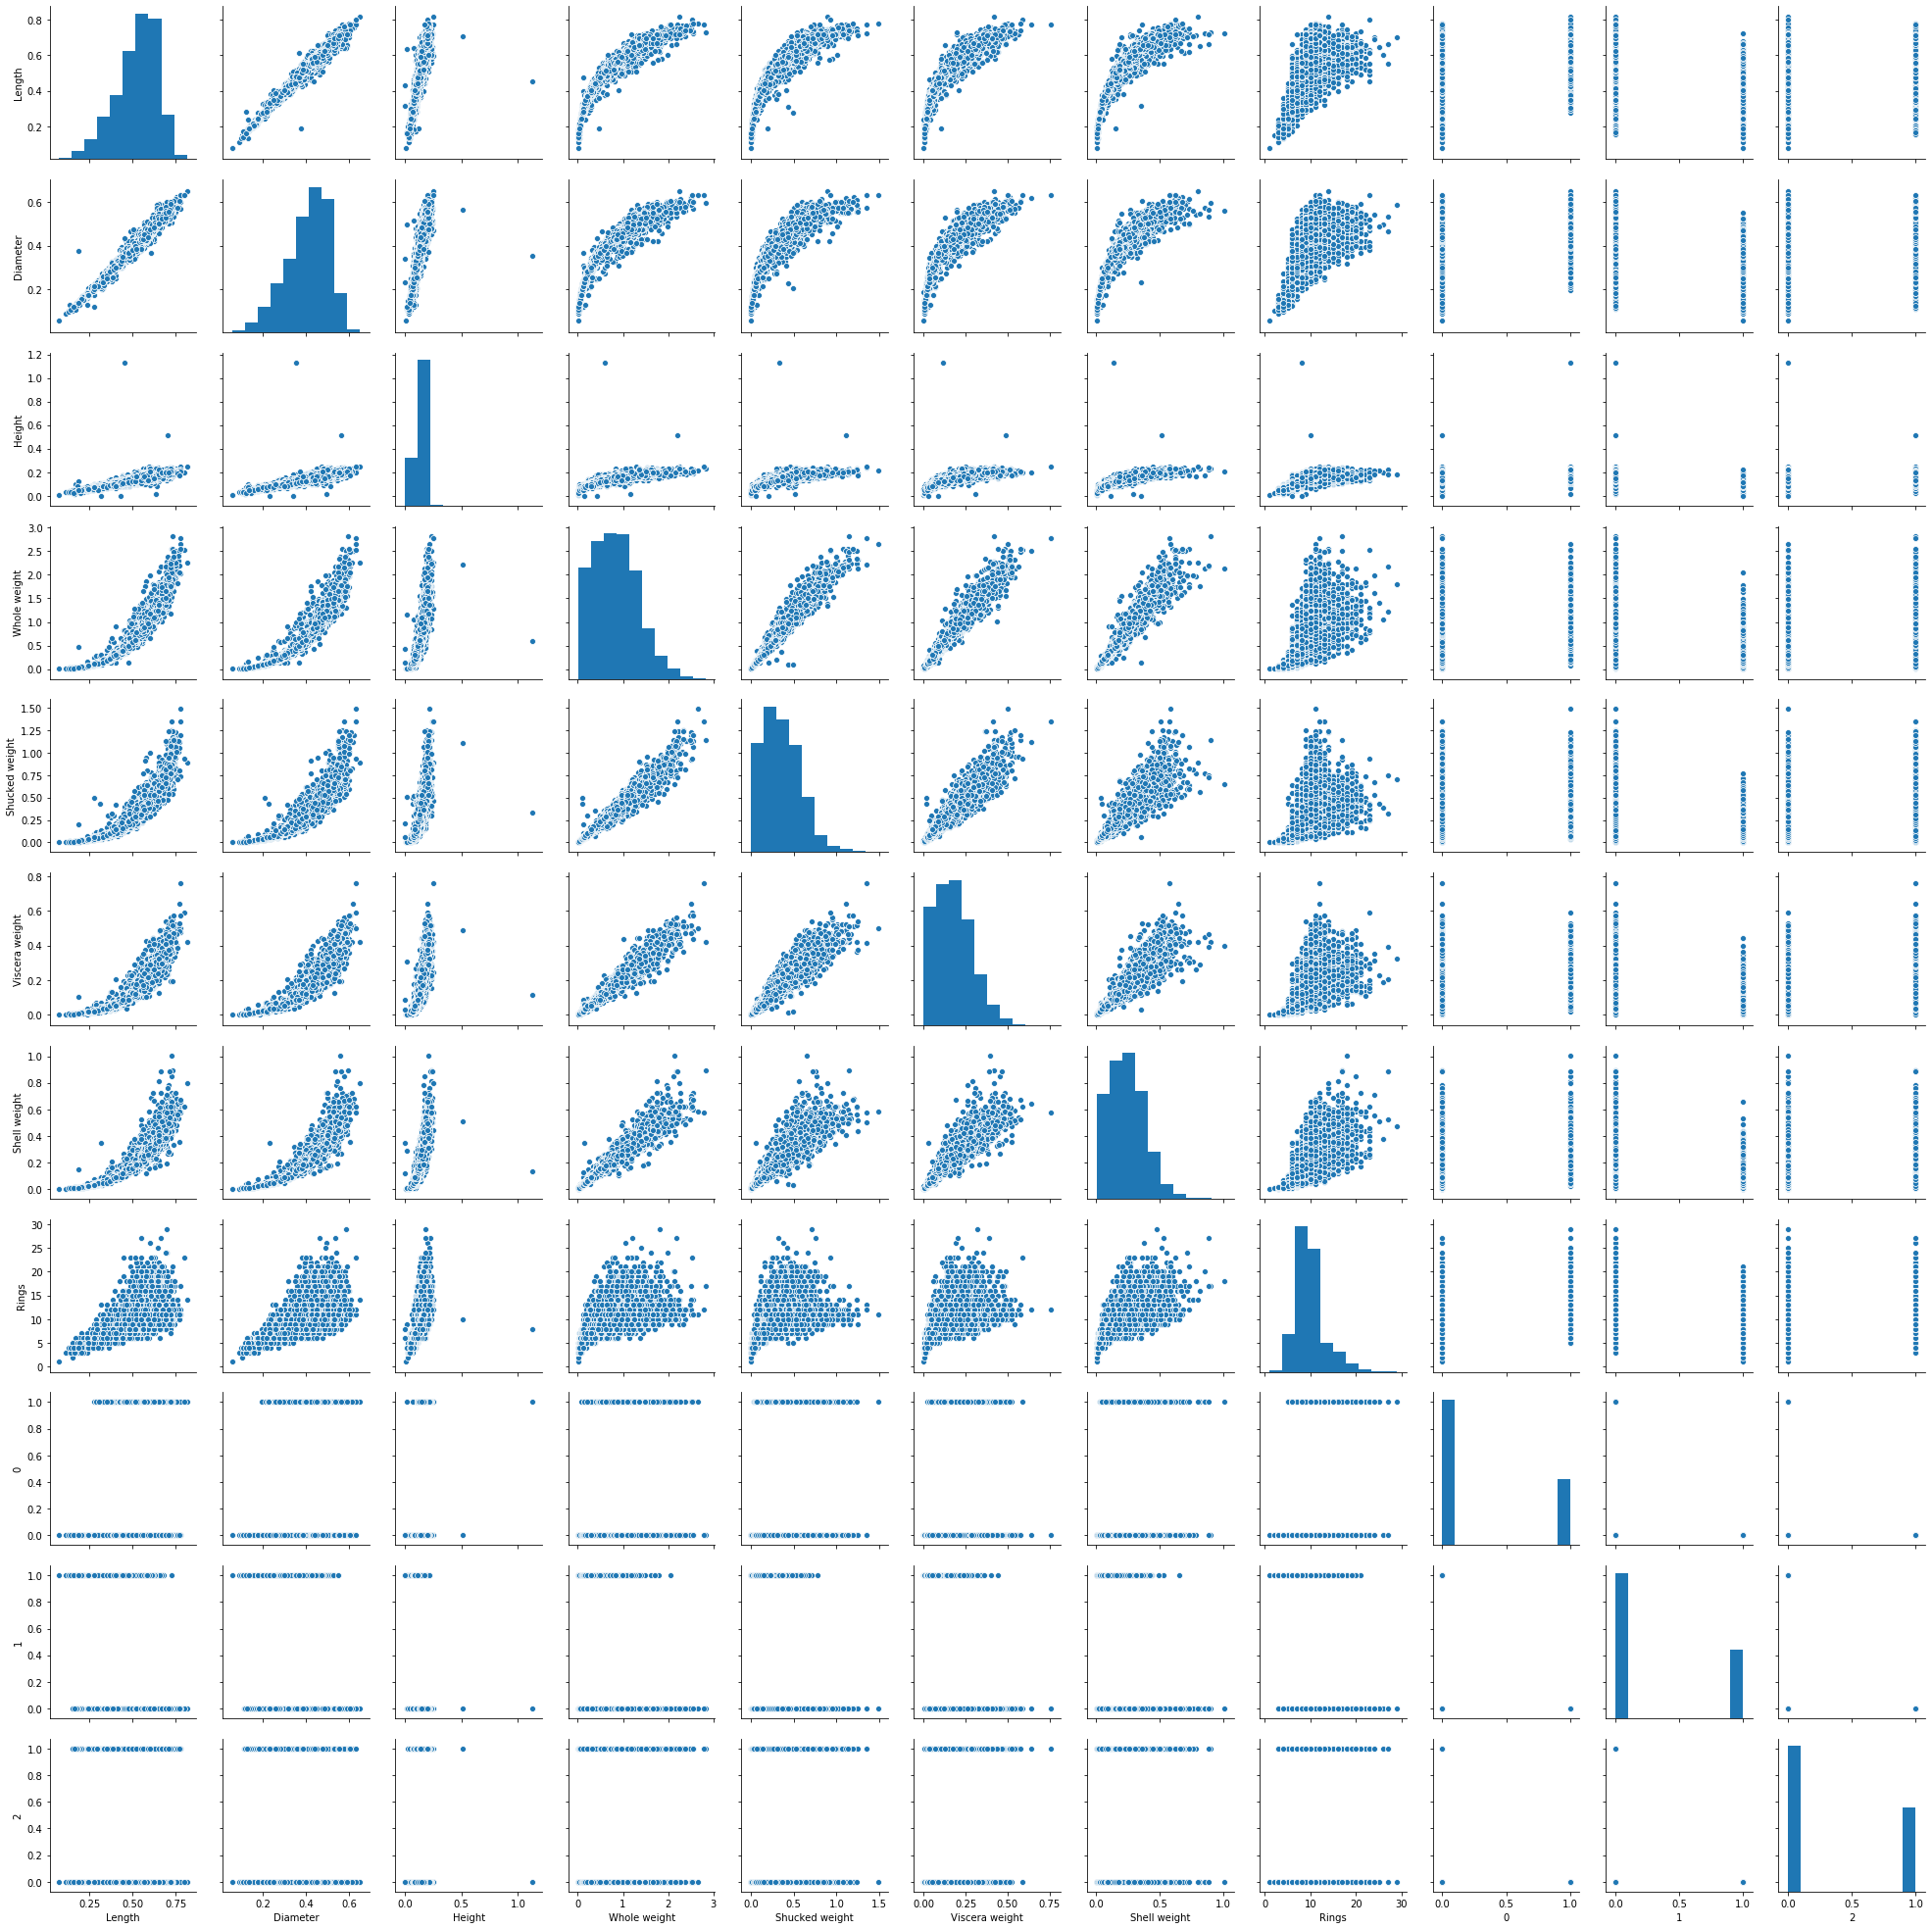

In [7]:
sns.pairplot(df)

In [8]:
#input features and target variables
X=df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight', 0, 1, 2]]
y=df['Rings'].values


In [9]:
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
X= sc.fit_transform(X)
y= y.reshape(-1,1)
y=sc.fit_transform(y)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature 
#or array.reshape(1, -1) if it contains a single sample.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#output category y

In [11]:
from keras import Sequential
from keras.layers import Dense
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=10, input_dim=10))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

Using TensorFlow backend.


In [12]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

In [13]:
results=regressor.fit(X_train,y_train)

Epoch 1/100
2923/2923 [==============================] - 0s 137us/step - loss: 0.0204 - mae: 0.1009 - accuracy: 3.4211e-04
Epoch 2/100
2923/2923 [==============================] - 0s 42us/step - loss: 0.0086 - mae: 0.0669 - accuracy: 3.4211e-04
Epoch 3/100
2923/2923 [==============================] - 0s 41us/step - loss: 0.0083 - mae: 0.0660 - accuracy: 3.4211e-04
Epoch 4/100
2923/2923 [==============================] - 0s 49us/step - loss: 0.0081 - mae: 0.0648 - accuracy: 3.4211e-04
Epoch 5/100
2923/2923 [==============================] - 0s 44us/step - loss: 0.0079 - mae: 0.0636 - accuracy: 3.4211e-04
Epoch 6/100
2923/2923 [==============================] - 0s 42us/step - loss: 0.0076 - mae: 0.0631 - accuracy: 3.4211e-04
Epoch 7/100
2923/2923 [==============================] - 0s 50us/step - loss: 0.0075 - mae: 0.0619 - accuracy: 3.4211e-04
Epoch 8/100
2923/2923 [==============================] - 0s 45us/step - loss: 0.0073 - mae: 0.0621 - accuracy: 3.4211e-04
Epoch 9/100
2923/2923 [

In [14]:
y_pred= regressor.predict(X_test)

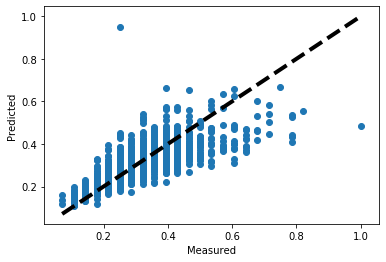

In [15]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()